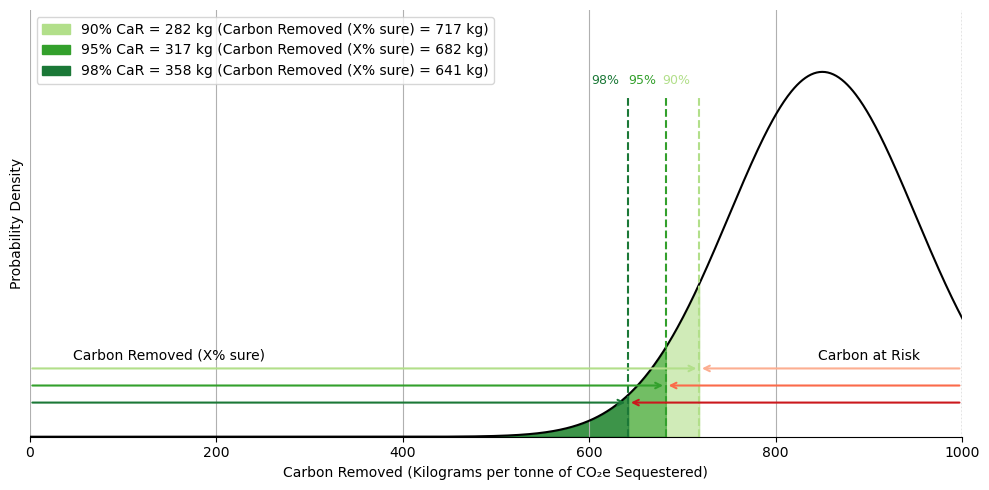

In [5]:
# Script for Figure 1b. Definition of Car and X% sure carbon removed

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import truncnorm
from matplotlib.patches import Patch

# Parameters for the truncated normal distribution
mean, std_dev = 850, 100
a, b = (0 - mean) / std_dev, (1000 - mean) / std_dev
x_vals = np.linspace(0, 1000, 1000)
pdf_vals = truncnorm.pdf(x_vals, a, b, loc=mean, scale=std_dev)

# Define confidence levels and colors
confidence_levels = [0.90, 0.95, 0.98]
# Define red shades for CaR arrows
colors = ['#b2df8a', '#33a02c', '#1b7837']
# Define red shades for carbon removed arrows
red_shades = ['#fcae91', '#fb6a4a', '#cb181d']  # Light to dark red

# Compute CaR thresholds
CaR_thresholds = [truncnorm.ppf(1 - cl, a, b, loc=mean, scale=std_dev) for cl in confidence_levels]

# Plotting
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x_vals, pdf_vals, color='black')

legend_elements = []
for cl, car_val, color in zip(confidence_levels, CaR_thresholds, colors):
    x_fill = np.linspace(0.1, car_val, 500)
    y_fill = truncnorm.pdf(x_fill, a, b, loc=mean, scale=std_dev)
    ax.fill_between(x_fill, y_fill, color=color, alpha=0.6)
    ax.axvline(x=car_val, ymax=0.004 / 0.005, color=color, linestyle='--')
    ax.text(car_val - 10, 0.0041, f'{int(cl * 100)}%', color=color,
            va='bottom', ha='right', fontsize=9)
    
    # Compute and format both CaR and Carbon Removed 
    car_value = int(1000 - car_val)
    carbon_removed = int(car_val)
    legend_label = f"{int(cl*100)}% CaR = {car_value} kg (Carbon Removed (X% sure) = {carbon_removed} kg)"
    
    legend_elements.append(Patch(color=color, label=legend_label))

# Horizontal arrows and label: CAR
arrow_ys = [0.0008, 0.0006, 0.0004]
for y, car_val, color in zip(arrow_ys, CaR_thresholds,  red_shades):
    ax.annotate('', xy=(car_val, y), xytext=(1000, y),
                arrowprops=dict(arrowstyle='->', color=color, lw=1.5))
ax.text(900, 0.0009, "Carbon at Risk", fontsize=10, ha='center')

# Horizontal arrows and label: Carbon Removed
arrow_ys = [0.0008, 0.0006, 0.0004]
arrow_x_starts = [0, 0, 0]  # Adjust these as needed for clarity

for x_start, y, car_val, color in zip(arrow_x_starts, arrow_ys, CaR_thresholds, colors):
    ax.annotate('', xy=(car_val, y), xytext=(x_start, y),
                arrowprops=dict(arrowstyle='->', color=color, lw=1.5))

ax.text(150, 0.0009, "Carbon Removed (X% sure)", fontsize=10, ha='center')


# Grid line at 1000
ax.axvline(x=1000, color='gray', linestyle=':', linewidth=1)

# Formatting
ax.set_xlabel("Carbon Removed (Kilograms per tonne of CO₂e Sequestered)")
ax.set_ylabel("Probability Density")
ax.set_xlim(0, 1000)
ax.set_ylim(0, 0.005)
ax.set_yticks([])
ax.grid(True)
ax.legend(handles=legend_elements, loc='upper left')

# Remove top, left, and right spines only
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

fig.savefig(r'CaRDefinition1b.png', dpi=300)


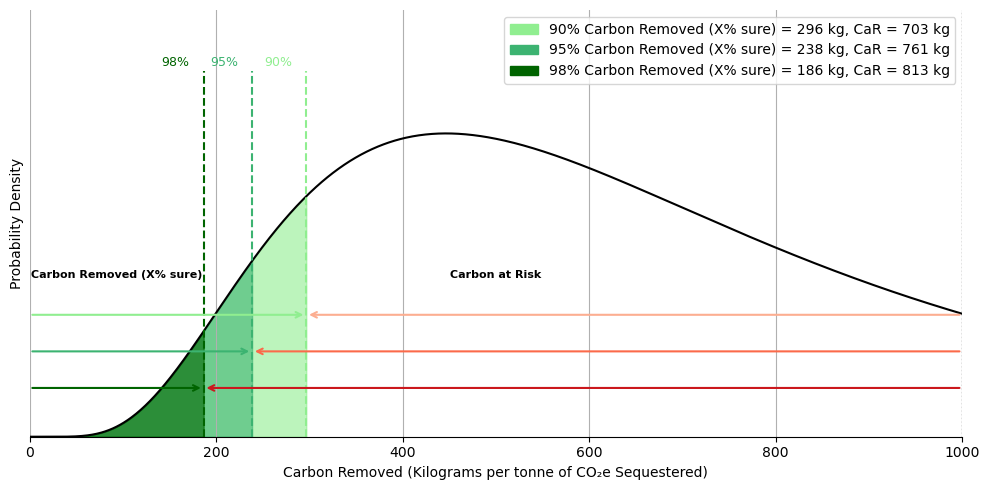

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm
from matplotlib.patches import Patch

# Define the log-normal distribution
shape = 0.6
scale = 640
x_vals = np.linspace(0.1, 1000, 1000)
pdf_vals = lognorm.pdf(x_vals, s=shape, scale=scale)

# Confidence levels
confidence_levels = [0.90, 0.95, 0.98]
colors_green = ['lightgreen', 'mediumseagreen', 'darkgreen']
colors_red = ['#fcae91', '#fb6a4a', '#cb181d']  # For CaR arrows from Y-axis

# Compute thresholds and CaR
remaining_values = [lognorm.ppf(1 - cl, s=shape, scale=scale) for cl in confidence_levels]
car_loss_values = [1000 - val for val in remaining_values]

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x_vals, pdf_vals, color='black')

# Arrow height positions
arrow_ys = [0.0005, 0.00035, 0.0002]
legend_patches = []

# Plot shaded regions, vertical lines, and both arrows
for idx, (cl, val_loss, green_color, red_color) in enumerate(zip(confidence_levels, car_loss_values, colors_green, colors_red)):
    x_car = 1000 - val_loss
    x_fill = np.linspace(0.1, x_car, 500)
    y_fill = lognorm.pdf(x_fill, s=shape, scale=scale)
    ax.fill_between(x_fill, y_fill, color=green_color, alpha=0.6)

    ax.axvline(x=x_car, ymax=0.0015 / 0.00175, color=green_color, linestyle='--')
    ax.text(x_car - 15, 0.00151, f'{int(cl * 100)}%', color=green_color,
            va='bottom', ha='right', fontsize=9)

    # Arrow for CaR (red, right side)
    ax.annotate('', xy=(1000, arrow_ys[idx]), xytext=(x_car,arrow_ys[idx]),
                arrowprops=dict(arrowstyle='<-', color=red_color, lw=1.5))

    # Arrow for CaR (green, left side)
    ax.annotate('', xy=(x_car, arrow_ys[idx]), xytext=(0, arrow_ys[idx]),
                arrowprops=dict(arrowstyle='->', color=green_color, lw=1.5))

    legend_patches.append(Patch(color=green_color, label=f'{int(cl*100)}% Carbon Removed (X% sure) = {int(x_car)} kg, CaR = {int(val_loss)} kg'))

# Add label: Carbon at Risk
ax.text(500, 0.00065, "Carbon at Risk", ha='center', fontsize=8, fontweight='bold')
# Add label: Carbon Removed
ax.text(93, 0.00065, "Carbon Removed (X% sure)", ha='center', fontsize=8, fontweight='bold')

# Customize axes
ax.set_xlim(0, 1000)
ax.set_ylim(0, 0.00175)
ax.set_xlabel("Carbon Removed (Kilograms per tonne of CO₂e Sequestered)")
ax.set_ylabel("Probability Density")
ax.set_yticks([])
ax.axvline(x=1000, color='gray', linestyle=':', linewidth=1)
ax.grid(True)
ax.legend(handles=legend_patches, loc='upper right')

# Remove top, left, and right spines only
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

fig.savefig(r'CaRDefinition1bSI.png', dpi=300)
